In [1]:
import numpy as np
import matplotlib.pylab as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
nx, ny = (100, 100)
x1 = np.linspace(-2.0, 2.0, nx)
x2 = np.linspace(-2.0, 2.0, ny)
X1, X2 = np.meshgrid(x1, x2)

def CIM(x1, x2, ks):
    N = len(x1)
    CIM = np.zeros(shape=(N, N))
    for i in range(N):
        for j in range(N):
            CIM[i, j] = 1.0 - np.exp(-0.5*x1[i]**2/ks**2)/2 - np.exp(-0.5*x2[j]**2/ks**2)/2
    return CIM

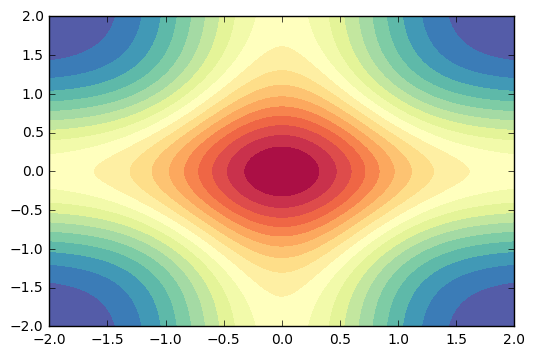

In [3]:
slider_ks = widgets.FloatSlider(description='Kernel size', value=1.0, 
                                min=0.1, max=2.0, step=0.1, continuous_update=False)
slider_ks.layout.width='60%'
plt.close()
display(slider_ks)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cim = CIM(x1, x2, slider_ks.value)
cm = ax.contourf(X1, X2, cim, cmap=plt.cm.Spectral,
                levels=np.linspace(np.amin(cim), np.amax(cim), 20))
#cb = plt.colorbar(cm)
display(fig)

def callback_ks(change):
    ks = change['new']
    ax.clear()
    cim = CIM(x1, x2, ks)
    cm = ax.contourf(X1, X2, cim, cmap=plt.cm.Spectral, 
                     levels=np.linspace(np.amin(cim), np.amax(cim), 20))
    #cb.on_mappable_changed(cm)
    clear_output(wait=True)
    display(fig)
    
slider_ks.observe(callback_ks, names='value')